<a href="https://colab.research.google.com/github/skdding3/Basic_statistic/blob/main/%EA%B9%80%EC%84%A0%EA%B8%B0/Stats_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

통계 연습용 신용카드 매출 데이터

In [152]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Data/202111 CreditCard_Data/train.csv')

In [153]:
df

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


In [154]:
df = df.fillna(0)

In [155]:
df.isnull().sum()

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64

In [156]:
#amount 매출액, 0보다 작은 음수는 거래 취소(환불)  amount의 단위는 KRW가 아닙니다.

In [157]:
df['amount'].mean() #평균

145.96230428488676

In [158]:
df['amount'].median() #중간값

75.0

In [159]:
from scipy import stats #절사 평균

stats.trim_mean(df['amount'],0.1) # trim_mean에서 0.1은 각 끝에서 10%를 제외

92.44563975380616

In [160]:
import numpy as np

np.average(df['amount'], weights=df['holyday']) #가중 평균 

134.881488440761

In [161]:
pip install wquantiles

In [162]:
import weighted

weighted.median(df['amount'], weights=df['holyday']) #가중 중간값 

80.0

In [163]:
df['amount'].std() #표준편차 

601.730590208499

In [164]:
df['amount'].quantile(0.75) - df['amount'].quantile(0.25) #IQR

118.0

In [165]:
from statsmodels import robust
robust.mad(df['amount']) #중위절대편차 mad

74.13011092528009

In [166]:
df['amount'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]) #amount (매출액) 백분위수 표기

0.05     10.0
0.25     32.0
0.50     75.0
0.75    150.0
0.95    437.0
Name: amount, dtype: float64

박스 플롯 

Text(0, 0.5, 'amount')

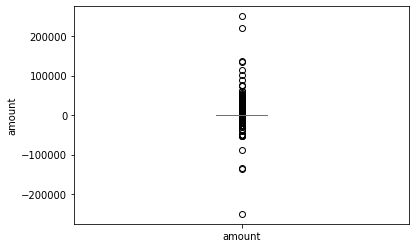

In [167]:
ax = (df['amount']).plot.box()

ax.set_ylabel('amount') #이상치값이 너무 커서 박스플롯이 그려지지 않는경우가 존재한다.

Text(0, 0.5, 'days_of_week')

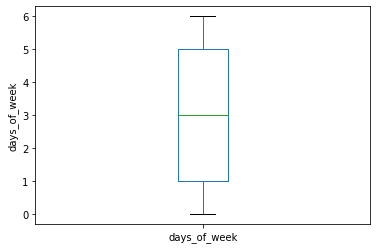

In [168]:
ax = (df['days_of_week']).plot.box()

ax.set_ylabel('days_of_week') #요일, 월요일이 0, 일요일은 6

In [169]:
import numpy as np

df_amount = np.log1p(df['amount']) #스케일 변환 (로그 대입) , 하지만 스케일링에 따라 다른 방법이 차용될 수있음.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


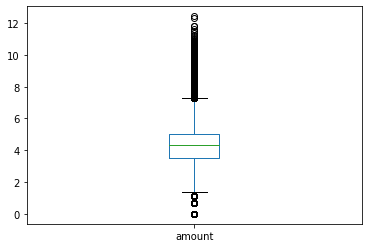

In [170]:
ax = (df_amount).plot.box()

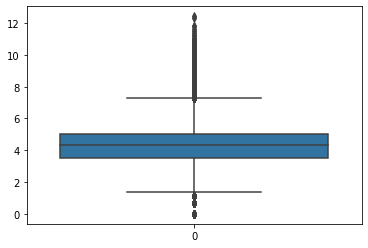

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data = df_amount)

plt.show() #스케일 변환후 박스플롯 시각화 (seaborn 적용용)

히스토그램

In [172]:
df['installments'].value_counts()

0.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64

In [173]:
binnedday = pd.cut(df['installments'],36)

binnedday.value_counts() #할부 개월수 빈도  이상과 미만 앞에 수치를 기준으로 해석 (구간화가 되었기때문에 표기가 범위로 해석)

(-0.036, 1.0]    3345936
(2.0, 3.0]         10686
(1.0, 2.0]          3431
(4.0, 5.0]          1220
(5.0, 6.0]           647
(9.0, 10.0]          252
(3.0, 4.0]           209
(11.0, 12.0]         206
(23.0, 24.0]          96
(7.0, 8.0]            32
(6.0, 7.0]            28
(8.0, 9.0]            25
(17.0, 18.0]          11
(19.0, 20.0]           6
(35.0, 36.0]           5
(21.0, 22.0]           4
(14.0, 15.0]           2
(25.0, 26.0]           0
(33.0, 34.0]           0
(32.0, 33.0]           0
(31.0, 32.0]           0
(30.0, 31.0]           0
(29.0, 30.0]           0
(28.0, 29.0]           0
(27.0, 28.0]           0
(26.0, 27.0]           0
(22.0, 23.0]           0
(10.0, 11.0]           0
(12.0, 13.0]           0
(13.0, 14.0]           0
(15.0, 16.0]           0
(16.0, 17.0]           0
(34.0, 35.0]           0
(18.0, 19.0]           0
(20.0, 21.0]           0
(24.0, 25.0]           0
Name: installments, dtype: int64

In [174]:
df_ins = pd.read_csv('/content/drive/MyDrive/Data/202111 CreditCard_Data/train.csv')

df_ins

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


In [178]:
df_ins = df_ins['installments'].dropna() #할부 안한개월수 제거거

df_ins

152        3.0
155        3.0
206        2.0
311        3.0
651        3.0
          ... 
3362429    3.0
3362486    3.0
3362514    2.0
3362701    3.0
3362740    2.0
Name: installments, Length: 16860, dtype: float64

In [184]:
df_ins.value_counts()

3.0     10686
2.0      3431
5.0      1220
6.0       647
10.0      252
4.0       209
12.0      206
24.0       96
8.0        32
7.0        28
9.0        25
18.0       11
20.0        6
36.0        5
22.0        4
15.0        2
Name: installments, dtype: int64

Text(0.5, 0, 'installments')

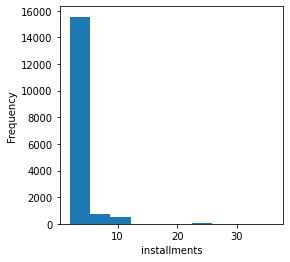

In [198]:
ax = (df_ins).plot.hist(figsize = (4,4))

ax.set_xlabel('installments')

Text(0.5, 0, 'days_of_week')

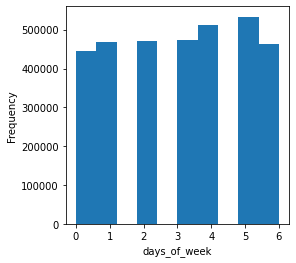

In [194]:
ax = (df['days_of_week']).plot.hist(figsize = (4,4))

ax.set_xlabel('days_of_week')

커널밀도추정 

Text(0.5, 0, 'installments')

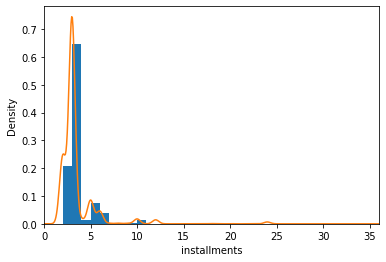

In [203]:
ax = df_ins.plot.hist(density = True, xlim=[0,36], bins=range(1,12))
df_ins.plot.density(ax=ax)

ax.set_xlabel('installments')